# Differential expression analysis

## Install and import dependencies

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite()

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtracklayer', 'rvg', 

In [2]:
biocLite(c("limma", "Glimma", "edgeR"))

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘limma’, ‘Glimma’, ‘edgeR’



The downloaded binary packages are in
	/var/folders/rg/srm_l7bx76l4q54xwrg_xv551z72j_/T//RtmpJpIUzo/downloaded_packages


Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtracklayer', 'rvg', 'selectr', 'seriation', 'shape', 'shinydashboard',
  'sigmaNet', 'sourcetools', 'stringi', 'stringr', 'survival', 'tibble',
  'tidyr', 'tidyselect', 'tikzDevice', 'viridis', '

In [3]:
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(scales)

Warning message:
“package ‘limma’ was built under R version 3.4.3”Warning message:
“package ‘Glimma’ was built under R version 3.4.2”Warning message:
“package ‘edgeR’ was built under R version 3.4.3”

In [4]:
getwd()

[1] "/Users/lvulliard/OneShotProject/RecArg1"

## Example analysis
https://www.bioconductor.org/help/workflows/RNAseq123/

In [5]:
biocLite("Mus.musculus")
library(Mus.musculus)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘Mus.musculus’
installing the source package ‘Mus.musculus’

Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtrack

### Load input files

In [6]:
url <- "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE63310&format=file"
utils::download.file(url, destfile="GSE63310_RAW.tar", mode="wb") 
utils::untar("GSE63310_RAW.tar", exdir = ".")
files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", "GSM1545538_purep53.txt",
  "GSM1545539_JMS8-2.txt", "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt",
  "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", "GSM1545545_JMS9-P8c.txt")
for(i in paste(files, ".gz", sep=""))
  R.utils::gunzip(i, overwrite=TRUE)

In [7]:
files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", 
   "GSM1545538_purep53.txt", "GSM1545539_JMS8-2.txt", 
   "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt", 
   "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", 
   "GSM1545545_JMS9-P8c.txt")
# Show data format
read.delim(files[1], nrow=5)

EntrezID,GeneLength,Count
497097,3634,1
100503874,3259,0
100038431,1634,0
19888,9747,0
20671,3130,1


In [8]:
# Directly construct matrix of gene count per condition
x <- readDGE(files, columns=c(1,3))
class(x)
dim(x)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 27179     9

In [9]:
# Input sample annotation
samplenames <- substring(colnames(x), 12, nchar(colnames(x)))
colnames(x) <- samplenames
group <- as.factor(c("LP", "ML", "Basal", "Basal", "ML", "LP", 
                     "Basal", "ML", "LP"))
x$samples$group <- group
lane <- as.factor(rep(c("L004","L006","L008"), c(3,4,2)))
x$samples$lane <- lane
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11,GSM1545535_10_6_5_11.txt,LP,32863052,1,L004
9_6_5_11,GSM1545536_9_6_5_11.txt,ML,35335491,1,L004
purep53,GSM1545538_purep53.txt,Basal,57160817,1,L004
JMS8-2,GSM1545539_JMS8-2.txt,Basal,51368625,1,L006
JMS8-3,GSM1545540_JMS8-3.txt,ML,75795034,1,L006
JMS8-4,GSM1545541_JMS8-4.txt,LP,60517657,1,L006
JMS8-5,GSM1545542_JMS8-5.txt,Basal,55086324,1,L006
JMS9-P7c,GSM1545544_JMS9-P7c.txt,ML,21311068,1,L008
JMS9-P8c,GSM1545545_JMS9-P8c.txt,LP,19958838,1,L008


In [10]:
# Input gene annotation
geneid <- rownames(x)
genes <- select(Mus.musculus, keys=geneid, columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

x$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID,SYMBOL,TXCHROM
497097,Xkr4,chr1
100503874,Gm19938,NA
100038431,Gm10568,NA
19888,Rp1,chr1
20671,Sox17,chr1
27395,Mrpl15,chr1


### Transform and filter data on abundance
CPM (counts per million) are just normalized by abundance in sample
Allows to compare between samples but not across genes (no normalization on gene length)

In [11]:
# head(10**6 * x$counts[,3] / colSums(x$counts)[3])
xCPM = cpm(x)
xLogCPM = cpm(x, log = T)
# NB: prior count of 0.25

In [12]:
table(rowSums(x$counts==0)==9)


FALSE  TRUE 
22026  5153 

In [13]:
keep.exprs <- rowSums(xCPM>1)>=3
x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

[1] 14165     9

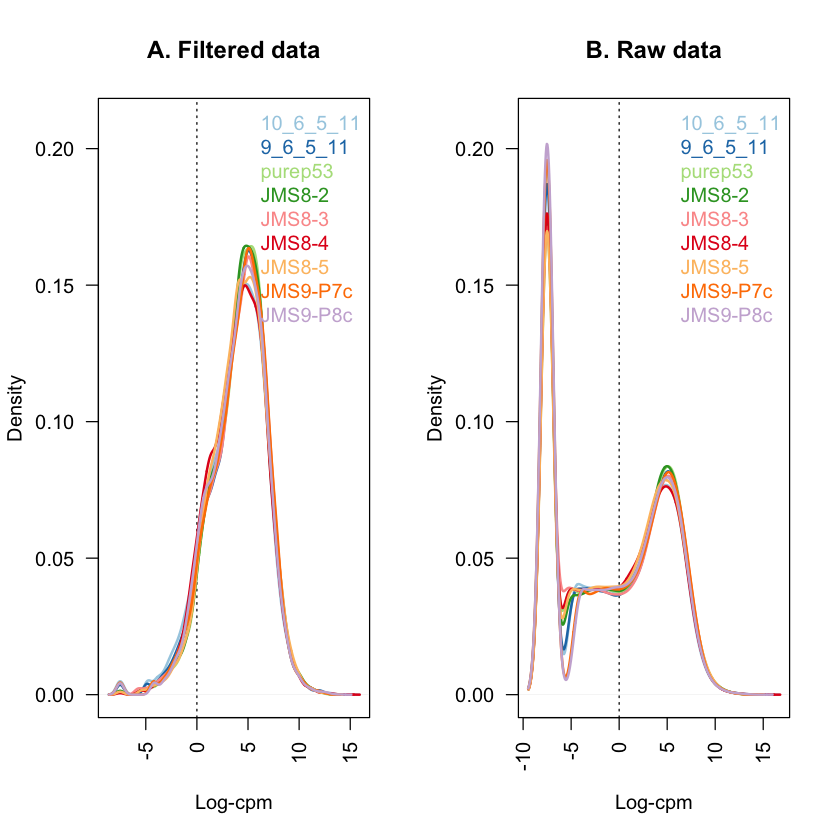

In [14]:
xLogCPMfiltered = cpm(x, log = T)

nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2))

plot(density(xLogCPMfiltered[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(xLogCPMfiltered[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

plot(density(xLogCPM[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(xLogCPM[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

In [15]:
x <- calcNormFactors(x, method = "TMM")
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11,GSM1545535_10_6_5_11.txt,LP,32832881,0.8957309,L004
9_6_5_11,GSM1545536_9_6_5_11.txt,ML,35296067,1.0349196,L004
purep53,GSM1545538_purep53.txt,Basal,57089259,1.0439552,L004
JMS8-2,GSM1545539_JMS8-2.txt,Basal,51304051,1.0405040,L006
JMS8-3,GSM1545540_JMS8-3.txt,ML,75724862,1.0323599,L006
JMS8-4,GSM1545541_JMS8-4.txt,LP,60457787,0.9223424,L006
JMS8-5,GSM1545542_JMS8-5.txt,Basal,55014064,0.9836603,L006
JMS9-P7c,GSM1545544_JMS9-P7c.txt,ML,21282257,1.0827381,L008
JMS9-P8c,GSM1545545_JMS9-P8c.txt,LP,19938942,0.9792607,L008


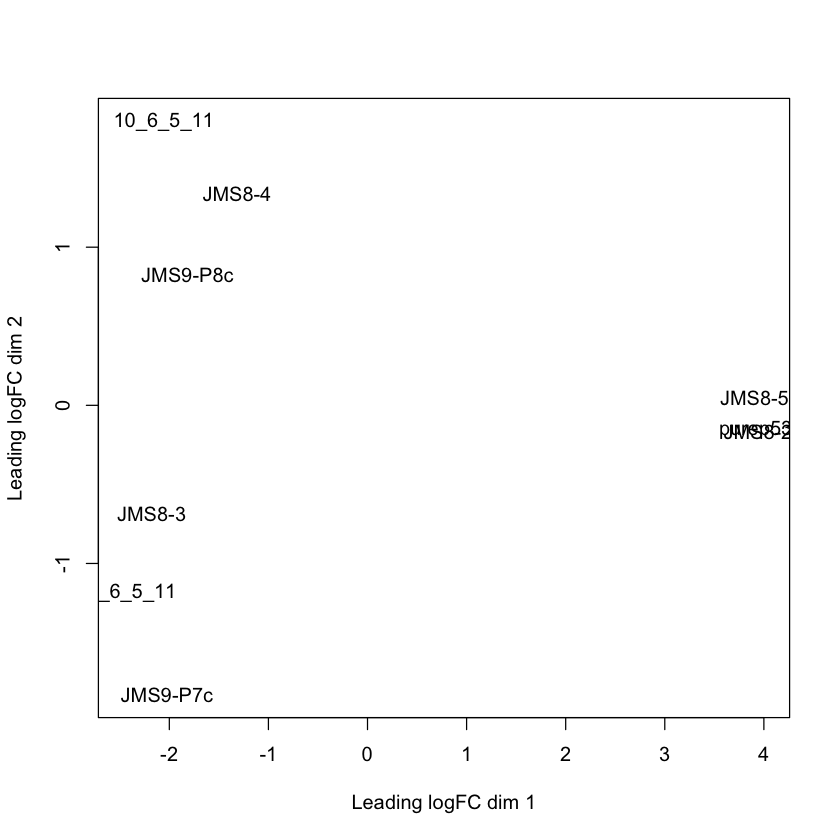

In [16]:
par(bg="white")
plotMDS(x) # Three distinct groups (LP/ML/Basal)

In [17]:
design <- model.matrix(~0+group+lane)
colnames(design) <- gsub("group", "", colnames(design))
design

,Basal,LP,ML,laneL006,laneL008
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,1,0
5,0,0,1,1,0
6,0,1,0,1,0
7,1,0,0,1,0
8,0,0,1,0,1
9,0,1,0,0,1


In [18]:
contr.matrix <- makeContrasts(
   BasalvsLP = Basal-LP, 
   BasalvsML = Basal - ML, 
   LPvsML = LP - ML, 
   levels = colnames(design))
contr.matrix

,BasalvsLP,BasalvsML,LPvsML
Basal,1,1,0
LP,-1,0,1
ML,0,-1,-1
laneL006,0,0,0
laneL008,0,0,0


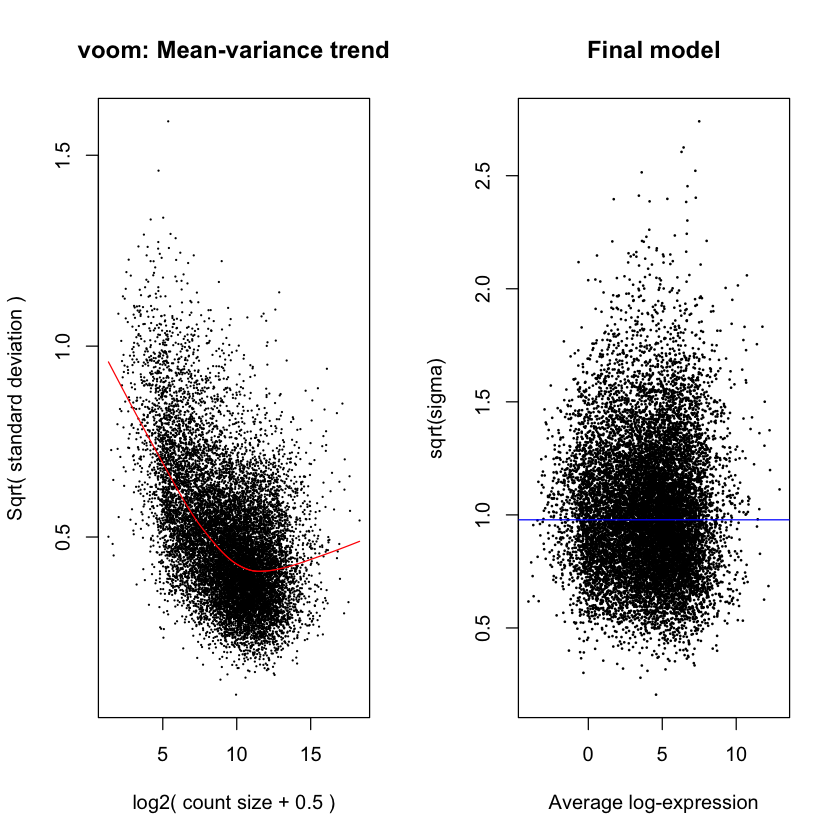

In [19]:
par(mfrow=c(1,2), bg="white")
v <- voom(x, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

In [20]:
v

,ENTREZID,SYMBOL,TXCHROM
1,497097,Xkr4,chr1
6,27395,Mrpl15,chr1
7,18777,Lypla1,chr1
9,21399,Tcea1,chr1
10,58175,Rgs20,chr1
11,108664,Atp6v1h,chr1
14,12421,Rb1cc1,chr1
17,319263,Pcmtd1,chr1
19,59014,Rrs1,chr1
20,76187,Adhfe1,chr1


In [21]:
summary(decideTests(efit))

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

In [22]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

       BasalvsLP BasalvsML LPvsML
Down        1417      1512    203
NotSig     11030     10895  13780
Up          1718      1758    182

In [23]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

[1] 2409

In [24]:
head(tfit$genes$SYMBOL[de.common], n=20)

[1] "Xkr4"          "Rgs20"         "Cpa6"          "Sulf1"        
 [5] "Eya1"          "Msc"           "Sbspon"        "Pi15"         
 [9] "Crispld1"      "Kcnq5"         "Ptpn18"        "Arhgef4"      
[13] "2010300C02Rik" "Aff3"          "Npas2"         "Tbc1d8"       
[17] "Creg2"         "Il1r1"         "Il18r1"        "Il18rap"

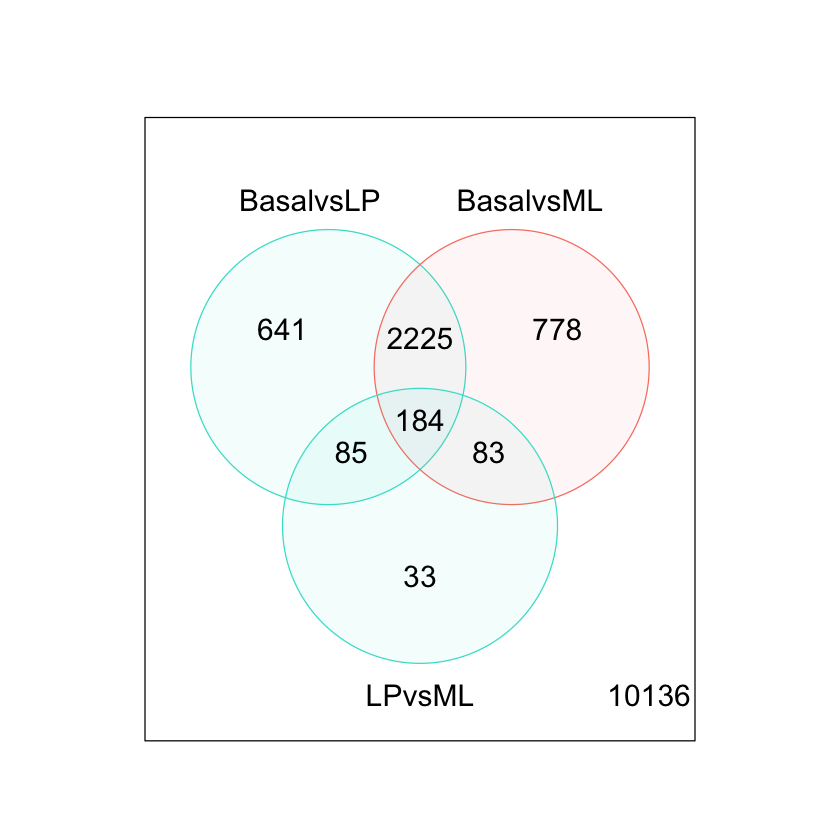

In [25]:
vennDiagram(dt[,1:3], circle.col=c("turquoise", "salmon"))

In [26]:
basal.vs.lp <- topTreat(tfit, coef=1, n=Inf)
basal.vs.ml <- topTreat(tfit, coef=2, n=Inf)
head(basal.vs.lp)

,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val
12759,12759,Clu,chr14,-5.442877,8.857907,-33.44429,3.990899e-10,2.703871e-06
53624,53624,Cldn7,chr11,-5.514605,6.296762,-32.94533,4.503694e-10,2.703871e-06
242505,242505,Rasef,chr4,-5.921741,5.119585,-31.77625,6.063249e-10,2.703871e-06
67451,67451,Pkp2,chr16,-5.724823,4.420495,-30.65370,8.010456e-10,2.703871e-06
228543,228543,Rhov,chr2,-6.253427,5.486640,-29.46244,1.112729e-09,2.703871e-06
70350,70350,Basp1,chr15,-6.073297,5.248349,-28.64890,1.380545e-09,2.703871e-06


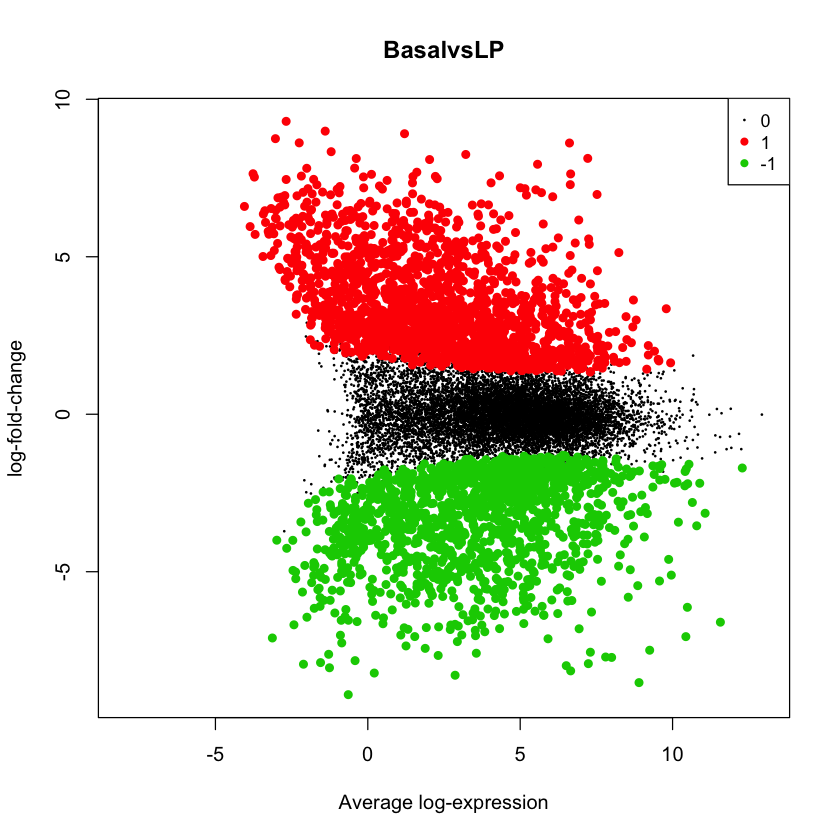

In [27]:
par(bg="white")
plotMD(tfit, column=1, status=dt[,1], main=colnames(tfit)[1], 
       xlim=c(-8,13))

In [28]:
basal.vs.lp.topgenes <- basal.vs.lp$ENTREZID[1:100]
i <- which(v$genes$ENTREZID %in% basal.vs.lp.topgenes)
mycol <- colorRampPalette(c("blue","white","red"))(1000)
d3heatmap(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10))

ERROR: Error in d3heatmap(v$E[i, ], scale = "row", labRow = v$genes$SYMBOL[i], : could not find function "d3heatmap"


## RecArg1 effect analysis

In [29]:
setwd("/Users/lvulliard/OneShotProject/RecArg1/counts")

### Counts with multi-mapping reads

In [118]:
countMat = matrix(nrow=26301, ncol=28)
colnames(countMat) <- list.files()
for (i in 1:28) {
    load(colnames(countMat)[i])
    countMat[,i] <- fcMulti$counts
}
rownames(countMat) <- rownames(fcMulti$counts)
# Four replicates of seven different conditions
conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,3,6)
# If s06 is Control RANKL rescue and s08 is Control rescue
# conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,6,3)

In [134]:
# Convert to DGE object
dgeData = DGEList(counts = countMat, genes = rownames(countMat), group = conditionList)

In [135]:
dim(dgeData)

[1] 26301    28

In [136]:
names(dgeData)

[1] "counts"  "samples" "genes"

In [137]:
table(rowSums(dgeData$counts==0)>=25)
table(rowSums(dgeData$counts==0)==28)


FALSE  TRUE 
20211  6090 


FALSE  TRUE 
22439  3862 

In [138]:
dgeDataLogCPMUnfiltered = cpm(dgeData, log = T)
dgeData = dgeData[rowSums(dgeData$counts==0)>=25,, keep.lib.sizes=FALSE]

3862 genes are never expressed, 6090 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [139]:
# Input gene annotation
genes <- select(Mus.musculus, keys=rownames(countMat), columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

dgeData$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID,SYMBOL,TXCHROM
497097,Xkr4,chr1
100503874,Gm19938,NA
100038431,Gm10568,NA
19888,Rp1,chr1
20671,Sox17,chr1
27395,Mrpl15,chr1


In [140]:
# Input sample annotation
dgeData$samples$aMEM = c(TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$aMEMwoLArg = c(FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE)[conditionList]
dgeData$samples$LArg = c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE)[conditionList]
dgeData$samples$recArg = c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$RANKL = c(FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE)[conditionList]
# dgeData$samples$mouse = c()
dgeData$samples

,group,lib.size,norm.factors,aMEM,aMEMwoLArg,LArg,recArg,RANKL
170227_s02.count,5,136,1,FALSE,TRUE,FALSE,FALSE,TRUE
170227_s04.count,6,109,1,FALSE,TRUE,TRUE,FALSE,TRUE
170227_s06.count,7,152,1,TRUE,FALSE,FALSE,TRUE,TRUE
170227_s08.count,1,91,1,TRUE,FALSE,FALSE,FALSE,FALSE
170227_s09.count,1,145,1,TRUE,FALSE,FALSE,FALSE,FALSE
170227_s10.count,2,122,1,FALSE,TRUE,FALSE,FALSE,FALSE
170227_s11.count,2,119,1,FALSE,TRUE,FALSE,FALSE,FALSE
170227_s12.count,3,59,1,FALSE,TRUE,TRUE,FALSE,FALSE
170227_s13.count,3,121,1,FALSE,TRUE,TRUE,FALSE,FALSE
170227_s14.count,4,119,1,TRUE,FALSE,FALSE,FALSE,TRUE


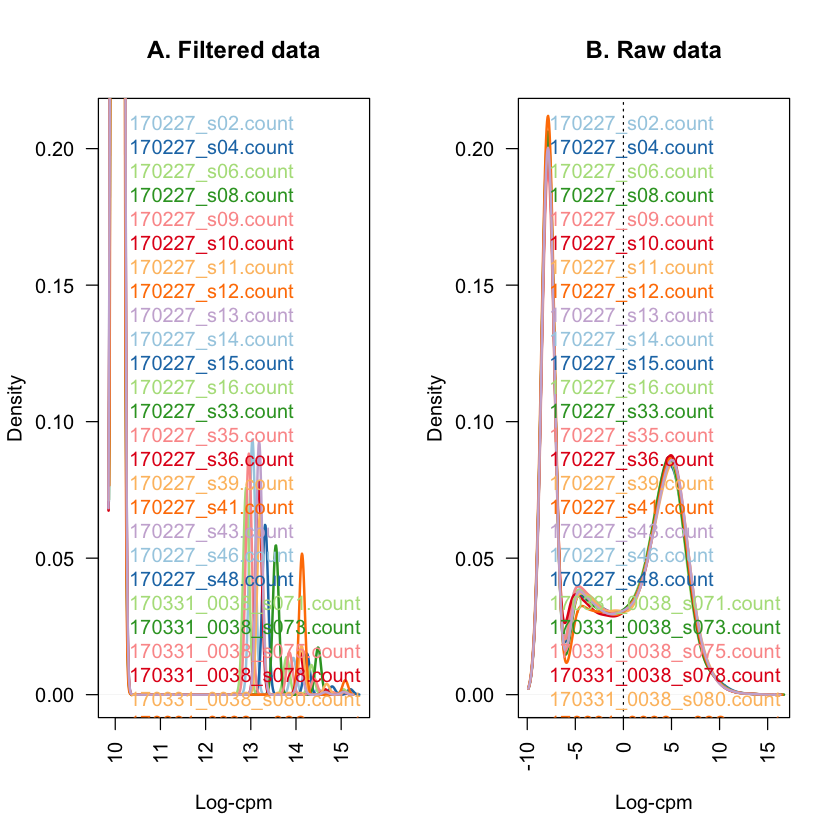

In [143]:
dgeDataLogCPM = cpm(dgeData, log = T)
# NB: prior count of 0.25

nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2), bg="white")

plot(density(dgeDataLogCPM[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(dgeDataLogCPM[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

plot(density(dgeDataLogCPMUnfiltered[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(dgeDataLogCPMUnfiltered[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

### Counts without multi-mapping reads

In [114]:
list.files()

[1] "170227_s02.count"       "170227_s04.count"       "170227_s06.count"      
 [4] "170227_s08.count"       "170227_s09.count"       "170227_s10.count"      
 [7] "170227_s11.count"       "170227_s12.count"       "170227_s13.count"      
[10] "170227_s14.count"       "170227_s15.count"       "170227_s16.count"      
[13] "170227_s33.count"       "170227_s35.count"       "170227_s36.count"      
[16] "170227_s39.count"       "170227_s41.count"       "170227_s43.count"      
[19] "170227_s46.count"       "170227_s48.count"       "170331_0038_s071.count"
[22] "170331_0038_s073.count" "170331_0038_s075.count" "170331_0038_s078.count"
[25] "170331_0038_s080.count" "170331_0038_s082.count" "s06.count"             
[28] "s08.count"

In [105]:
countMat = matrix(nrow=26301, ncol=28)
colnames(countMat) <- list.files()
for (i in 1:28) {
    load(colnames(countMat)[i])
    countMat[,i] <- fcStrict$counts
}
rownames(countMat) <- rownames(fcStrict$counts)
# Four replicates of seven different conditions
conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,6,3)

In [106]:
# Convert to DGE object
dgeData = DGEList(counts = countMat, genes = rownames(countMat), group = conditionList)

In [107]:
dim(dgeData)

[1] 26301    28

In [108]:
names(dgeData)

[1] "counts"  "samples" "genes"

In [109]:
table(rowSums(dgeData$counts==0)>=25)
table(rowSums(dgeData$counts==0)==28)


FALSE  TRUE 
19034  7267 


FALSE  TRUE 
21291  5010 

3862 genes are never expressed, 6090 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [110]:
# Input gene annotation
genes <- select(Mus.musculus, keys=rownames(countMat), columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

dgeData$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID,SYMBOL,TXCHROM
497097,Xkr4,chr1
100503874,Gm19938,NA
100038431,Gm10568,NA
19888,Rp1,chr1
20671,Sox17,chr1
27395,Mrpl15,chr1


### Previous work on FPKM

In [ ]:
# Input sample annotation
dgeData$samples$aMEM = rep(c(TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE),4)
dgeData$samples$aMEMwoLArg = rep(c(FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE),4)
dgeData$samples$LArg = rep(c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE),4)
dgeData$samples$recArg = rep(c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE),4)
dgeData$samples$RANKL = rep(c(FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE),4)
dgeData$samples$mouse = c(rep(1,7), rep(2,7), rep(3,7), rep(4,7))
dgeData$samples

In [ ]:
table(rowSums(dgeData$counts==0)>=25)
table(rowSums(dgeData$counts==0)==28)

4201 genes are never expressed, 6293 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [ ]:
dgeDataExpressed <- dgeData[rowSums(dgeData$counts==0)<25,, keep.lib.sizes=FALSE]
dim(dgeDataExpressed)

Fpkm cannot be used to compare samples so we convert values to TPM
NB: TPM gives the proportion of transcripts in a sample, so one value depends on the others and comparing TPM values of one gene across samples does not make sense without taking into account the other values. On the other hand comparing full TPM profiles between samples seems coherent.

In [ ]:
fpkmToTpm <- function(fpkm)
{
    exp(log(fpkm) - log(sum(fpkm)) + log(1e6))
}

In [ ]:
dgeDataTPM = apply(dgeDataExpressed, 2, fpkmToTpm)

In [ ]:
nsamples <- 28
col <- rep(brewer.pal(7, "Set3"), 4)
par(bg="white")

plot(density(dgeDataExpressed$counts[,1]), col=alpha(col[1], 0.8), lwd=2, xlim = c(-10,250), ylim=c(0,0.2), las=2, 
     main="", xlab="")
title(main="FPKM in filtered data", xlab="TPM")
for (i in 2:nsamples){
   den <- density(dgeDataExpressed$counts[,i])
   lines(den$x, den$y, col=alpha(col[i], 0.8), lwd=2)
}
abline(v = -7, lty=2)
legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

In [ ]:
par(bg="white")

plot(density(dgeDataTPM[,1]), col=alpha(col[1], 0.8), lwd=2, xlim = c(-10,250), ylim=c(0,0.2), las=2, 
     main="", xlab="")
title(main="TPM in filtered data", xlab="TPM")
for (i in 2:nsamples){
   den <- density(dgeDataTPM[,i])
   lines(den$x, den$y, col=alpha(col[i], 0.8), lwd=2)
}
abline(v = -7, lty=2)
legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

Area under the curve should stay constant, since for every sample TPM values add up to one million.

In [ ]:
plot(cumsum(dgeDataTPM[,1]), col=alpha(col[1], 0.5), lwd=1, ylim=c(0,1000000), las=1, 
     main="", xlab="", ylab = "", type = "l")
title(main="TPM in filtered data", xlab="Genes", ylab ="cumulative sum of TPM")
for (i in 2:nsamples){
   den <- cumsum(dgeDataTPM[,i])
   lines(den, col=alpha(col[i], 0.5), lwd=1)
}
#legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

## TPM correlation between samples

In [ ]:
library(d3heatmap)
d3heatmap(cor(dgeDataTPM), theme = "dark")

In [ ]:
# Minimal correlation between replicates for each condition
sapply(1:7, function(x) min(cor(dgeDataTPM[,x+0:3*7])))

In [ ]:
# Minimal correlation between conditions for each replicate
sapply(1:4, function(x) min(cor(dgeDataTPM[,7*(x-1) + 1:7])))

In [ ]:
# Minimal overall correlation
min(cor(dgeDataTPM))

In [ ]:
# Median correlation between replicates for each condition
sapply(1:7, function(x) median(cor(dgeDataTPM[,x+0:3*7])))

In [ ]:
# Median correlation between conditions for each replicate
sapply(1:4, function(x) median(cor(dgeDataTPM[,7*(x-1) + 1:7])))

In [ ]:
# Median overall correlation
median(cor(dgeDataTPM))

In [ ]:
par(bg = "white")
plotMDS(dgeDataTPM, col = col)

In [ ]:
par(bg = "white")
plotMDS(dgeDataExpressed, col = col)

In [ ]:
par(bg = "white")
plotMDS(dgeData, col = col)
png("mdsFPKM.png")
plotMDS(dgeData, col = col)
dev.off()

NB: Convertion to TPM fucks things up

In [ ]:
colSums(apply(dgeDataExpressed, 2, fpkmToTpm))

In [ ]:
dgeDataExpressed$counts

In [ ]:
dgeDataTPM

In [ ]:
# designData <-with(dgeData$samples, model.matrix(~mouse+RANKL+recArg+LArg+aMEM+aMEMwoLArg))
designData <- with(dgeData$samples, model.matrix(~0+mouse+group))
# colnames(designData) <- gsub("group", "", colnames(design))
designData

In [ ]:
dgeDataLogTPM = log2(dgeDataTPM+1)

In [ ]:
par(bg = "white")
plotMDS(dgeDataLogTPM, col = col)
png("mdsLogTPM.png")
plotMDS(dgeDataLogTPM, col = col)
dev.off()

In [ ]:
contrMatrixData <- makeContrasts(
    rescueEff = group6-group5,
    recArgSpec = group7-group4,
    rescueSpec = group6-group4, 
   levels = colnames(designData))
contrMatrixData

In [ ]:
par(mfrow=c(1,2), bg="white")
v <- voom(x, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

In [ ]:
lmData = lmFit(dgeDataLogTPM, design = designData)
contrFitData = contrasts.fit(lmData, contrasts=contrMatrixData)
eFitBayes = eBayes(contrFitData, trend = TRUE)

In [ ]:
par(bg="white")
plotSA(eFitBayes, main="limma-trend model")

In [ ]:
??plotMDS

In [99]:
library(d3heatmap)
sampleLabels = paste0("s", 1:28, "_", conditionList)
d3heatmap(cor(dgeData$counts), theme = "dark", symm=T, labRow = sampleLabels, labCol = sampleLabels)

HTML widgets cannot be represented in plain text (need html)

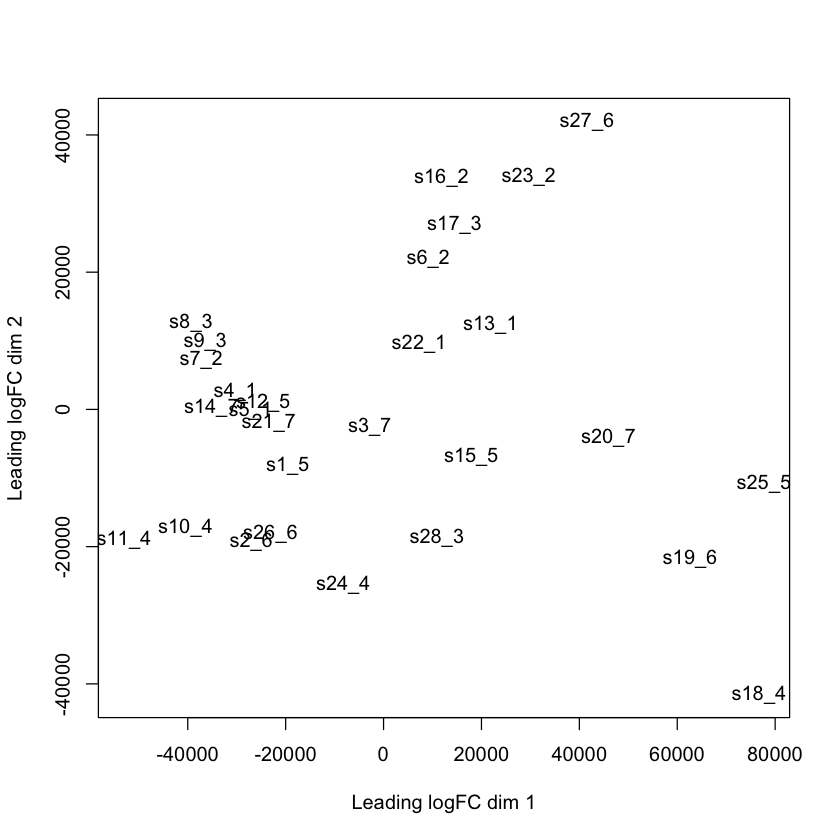

In [104]:
par(bg = "white")
plotMDS(dgeData$counts, labels = sampleLabels)